# Underachiever Detection in Garment Manufacturing: A Machine Learning Approach





## Dataset Information

**Additional Information**

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly **labour-intensive** industry with lots of **manual processes**. Satisfying the huge global demand for garment products is mostly dependent on the **production and delivery performance** of the employees in the garment manufacturing companies. Therefore, it is highly desirable among the decision makers in the garments industry to track, analyse, and predict the **productivity performance** of the working teams in their factories.

# Key Properties of Our Models

1. **Binary Classifier**  
   Our model is a binary classifier.

2. **Focus on Underachievers**  
   We assume our customers are more interested in detecting underachievers in their companies. Therefore, underachieving observations are assigned a positive value (1) for the dependent variable. This directs the fitting process to optimize the prediction of underachievers.

3. **Error Definitions**  
   - **Type I Error (False Positive)**: The number of employees predicted to be underperforming while they are actually well-performing.  
   - **Type II Error (False Negative)**: The number of employees predicted to be well-performing while they are actually underperforming.  

   Misclassifying underachievers (Type II error) is considerably costly, as it can immediately affect business operations if not detected on time. In contrast, a false positive (Type I error) can be further examined without disrupting current performance.

4. **Performance Metric**  
   Based on the above, **Recall** is used to evaluate our model's performance.


## About this file

**Attribute Information:**

1. **date**: Date in MM-DD-YYYY.  
2. **day**: Day of the Week.  
3. **quarter**: A portion of the month. A month was divided into four quarters.  
4. **department**: Associated department with the instance.  
5. **teamno**: Associated team number with the instance.  
6. **noofworkers**: Number of workers in each team.  
7. **noofstylechange**: Number of changes in the style of a particular product.  
8. **targetedproductivity**: Targeted productivity set by the Authority for each team for each day.  
9. **smv**: Standard Minute Value, it is the allocated time for a task.  
10. **wip**: Work in progress. Includes the number of unfinished items for products.  
11. **overtime**: Represents the amount of overtime by each team in minutes.  
12. **incentive**: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.  
13. **idletime**: The amount of time when the production was interrupted due to several reasons.  
14. **idlemen**: The number of workers who were idle due to production interruption.  
15. **actual_productivity**: The actual % of productivity that was delivered by the workers. It ranges from 0-1.



## Summary of Our Methods

- **Data Preprocessing**:
  - Data imputation.
  - Dummy transformation (one-hot encoding) for categorical variables.
  - Standardization for numerical variables.
  - Feature selection:
    - Correlation matrix.
    - Forward stepwise selection.

- **Data Visualization**:
  - Numerical variables: Boxplot.
  - Categorical variables: Bar chart.

- **Model Fitting**:
  - **Linear Models**:
    - Logistic Regression (without regularization, with L1 regularization, and with L2 regularization).
    - Linear Discriminant Analysis.
    - Linear Support Vector Classifier (with L2 regularization).
  - **Non-linear Models**:
    - Naive Bayes.
    - Quadratic Discriminant Analysis.
    - Support Vector Classifier:
      - Radial basis function (with L2 regularization).
      - Polynomial kernel (degree 2 and degree 3).
    - Random Forest.
    - Gradient Boosting.

- **Evaluation Method**:
  - Nested cross-validation with separate training, validation, and test sets.


## Libraries used

- **pandas**: Data manipulation using DataFrames.
- **numpy**: Efficient numerical operations on arrays.
- **matplotlib.pyplot**: Basic plotting and visualization.
- **seaborn**: Enhanced statistical data visualizations.

**scikit-learn**:
- **model_selection**: Data splitting, cross-validation, and hyperparameter tuning.
- **preprocessing & compose**: Data scaling, encoding, and column transformations.
- **pipeline & impute**: Streamlined data processing and handling missing values.
- **feature_selection**: Selecting key features.
- **classification models & metrics**: Algorithms (e.g., Logistic Regression, SVM) and performance evaluation (accuracy, precision, etc.).

- **requests**: Making HTTP requests for web data.
- **io**: Handling in-memory file operations.

## Download the Dataset

This code downloads a CSV dataset from the specified URL and loads it into a DataFrame.

In [1]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import requests
import io

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv"
response = requests.get(url)
# Load the dataset into a DataFrame
if response.status_code == 200:
    df = pd.read_csv(io.StringIO(response.text))
    print("Dataset loaded successfully!")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

Dataset loaded successfully!


## Data Observations and Missing Value Imputation

By inspecting the information retrieved from `df.info()`, we have the following remarks:

1. There are a total of **1197 observations** and **14 independent variables**. Among these, nine are numerical data types, and five are general "object" data types. Four of the object variables (`quarter`, `department`, `day`, and `team`) will be converted into categorical data types based on the description of each variable.

2. The independent variable `wip` has only **691 non-null observations**. To address the missing values—and considering that its minimum value is 7—we decided to impute missing values with **0**, representing zero work in process.


In [2]:
# Explore the dataset & looks like there are a lot of empty data on wip column --> based on this you should say that we will impute values for wip.
df.info()
# %%
#Statistical summary of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [3]:
# Replace NA value in WIP as 0 because it means they don't have WIP
df["wip"]=df["wip"].fillna(0)

# Change type of those columns into catogorical type
df['quarter'] = df['quarter'].astype('category')
df['department'] = df['department'].astype('category')
df['day'] = df['day'].astype('category')
df['team'] = df['team'].astype('category')

#After those steps above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   date                   1197 non-null   object  
 1   quarter                1197 non-null   category
 2   department             1197 non-null   category
 3   day                    1197 non-null   category
 4   team                   1197 non-null   category
 5   targeted_productivity  1197 non-null   float64 
 6   smv                    1197 non-null   float64 
 7   wip                    1197 non-null   float64 
 8   over_time              1197 non-null   int64   
 9   incentive              1197 non-null   int64   
 10  idle_time              1197 non-null   float64 
 11  idle_men               1197 non-null   int64   
 12  no_of_style_change     1197 non-null   int64   
 13  no_of_workers          1197 non-null   float64 
 14  actual_productivity    1197 non-null   f

In [4]:
# Create target variable (non_achieve = 1 & achieve = 0) based on Actual Productivity vs Targeted Productivity
df['non_achieve_target'] = df['actual_productivity'] < df['targeted_productivity']
ratio = df["non_achieve_target"].value_counts()[True]/df["non_achieve_target"].value_counts()[False]
print("The ratio between the number of non-achieving and achieving people: ", ratio)
df['non_achieve_target'] = df['non_achieve_target'].map({True: 1, False: 0})

The ratio between the number of non-achieving and achieving people:  0.368


## Create Target Variable

This snippet creates a binary target variable `non_achieve_target` based on comparing `actual_productivity` and `targeted_productivity`. Records where actual productivity is lower than targeted productivity are flagged as non-achieving (1); otherwise, they're flagged as achieving (0). 

The ratio suggests that the data is **unbalanced**, hence, **stratified sampling** will be applied.

## Define independient variables

In this step, we define the feature matrix (`X`) and the target variable (`y`).

- **Feature Matrix (`X`)**:  
  We remove unnecessary columns that should not be used as predictors:
  - `'date'`: It is captured by the `'quarter'` variable.
  - `'non_achieve_target'`: This is the target variable, so it must be removed from the feature set.
  - `'actual_productivity'` & `'targeted_productivity'`: These may directly correlate with the target variable and could cause data leakage.

- **Target Variable (`y`)**:  
  - We define the target variable as `'non_achieve_target'`, which we aim to predict.


In [5]:
# Define the features & target Column
X = df.drop(['date','non_achieve_target','actual_productivity','targeted_productivity'], axis=1)
y = df['non_achieve_target']

## Separate Numerical and Categorical Features

This snippet identifies numerical features (columns with types `int64` or `float64`) and categorical features (columns with type `category`) from the DataFrame `X`. These are stored in `numerical_features` and `categorical_features` respectively.


In [6]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

## Data Visualization: Boxplots for Numerical Features

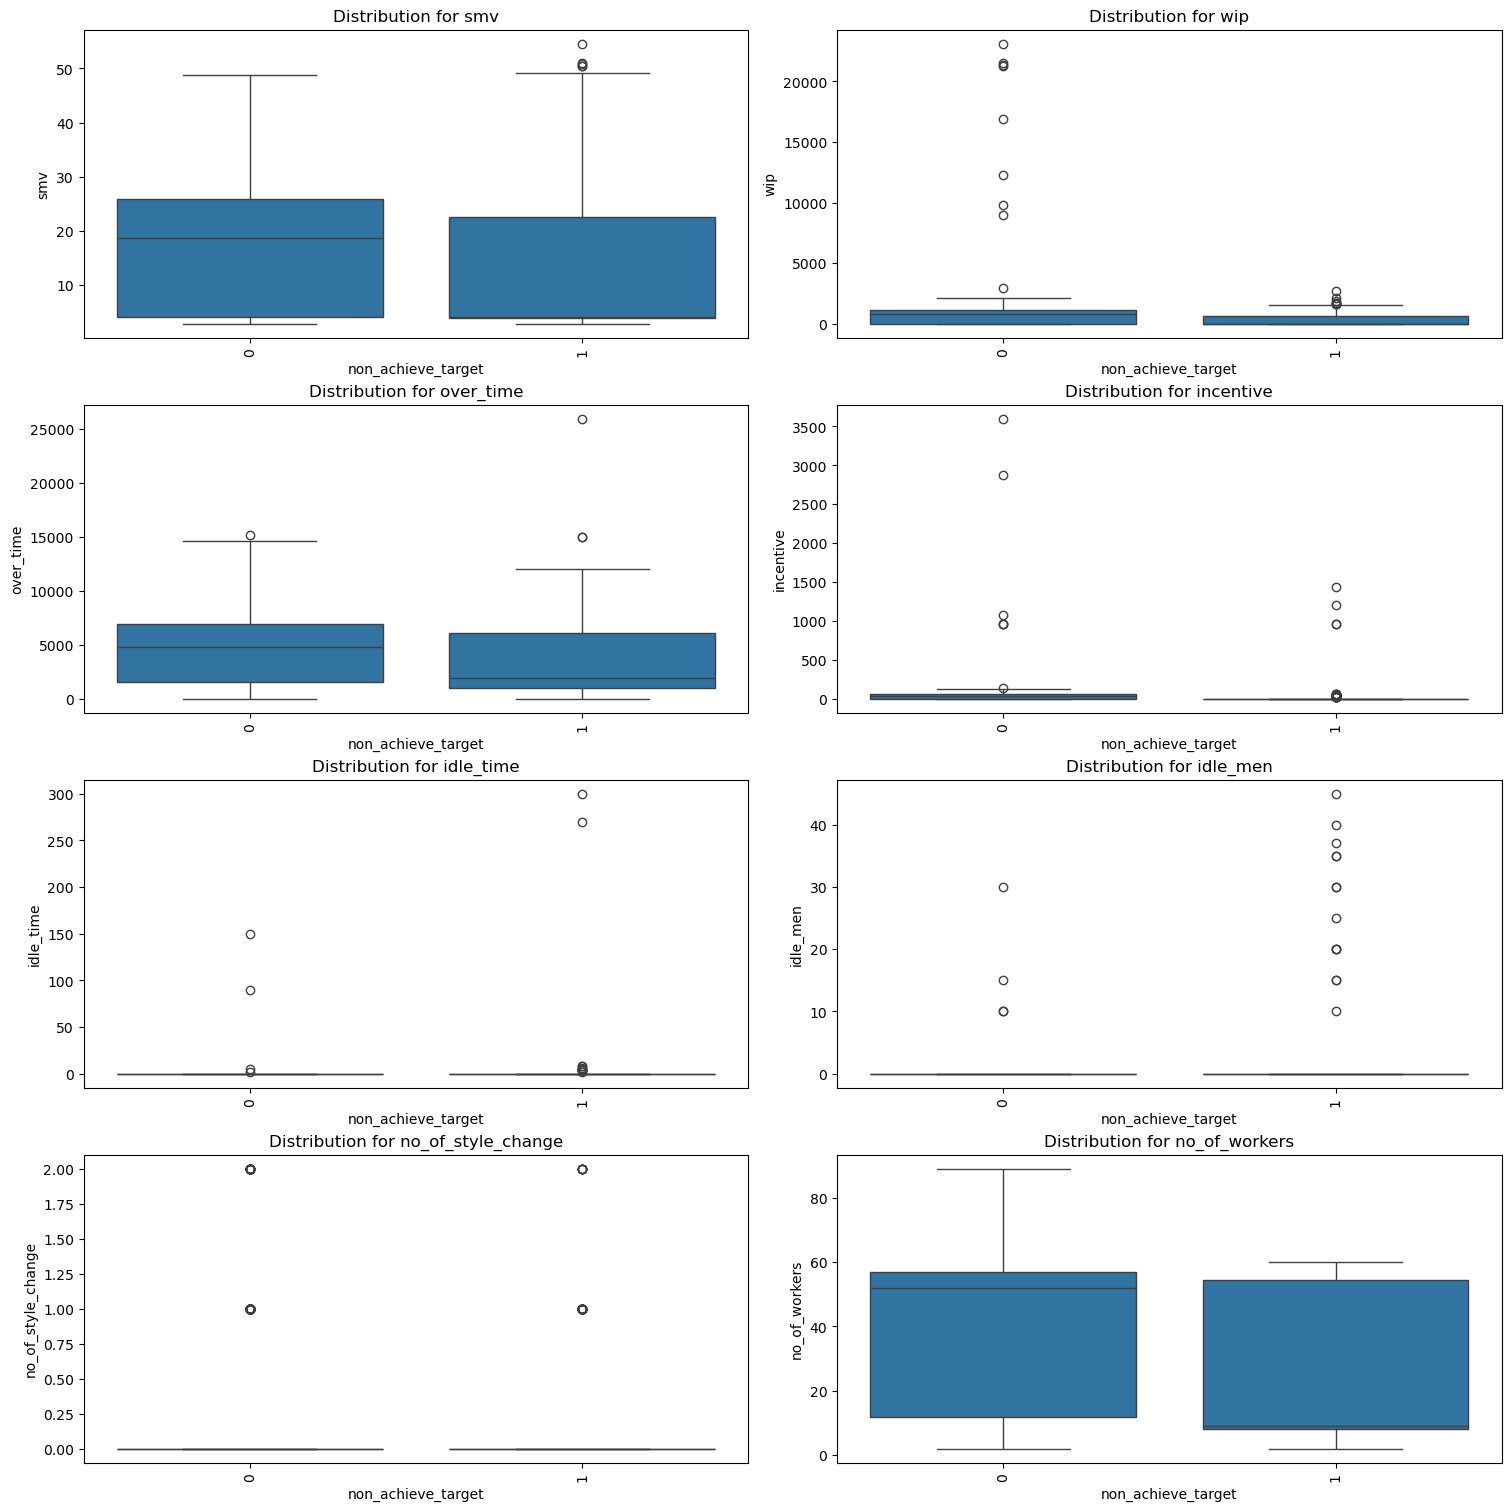

In [7]:
# Data Visualization - Histograms for Categorical Variables
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15), constrained_layout=True)
# Add padding between subplots
#fig.tight_layout(pad=15.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and plot in a subplot
for i, feature in enumerate(numerical_features):
    # Calculate percentage of target_achieved for each category

    # Plot histogram
    ax = axes[i]
    sns.boxplot(x=y, y=X[feature], ax = ax)
    #ax.set_xlim(0, 1.1*X[feature].max())
    #ax.set_xlabel(f"Values for {feature}")
    #ax.set_ylabel('Percentage of Target Achieved (%)')
    ax.set_title(f"Distribution for {feature}")
    ax.tick_params(axis='x', rotation=90)

plt.show()

This code visualizes the distribution of numerical features across the target variable (achievers vs. unachievers) using boxplots. By observing these plots, we have noted the following:

- An observation could be classified as an **unachiever** if:
  - **over_time** falls in the range [25000, +∞].
  - **idle_time** falls in the range [250, +∞].
  - **idle_men** falls in the range [40, +∞].

- An observation could be classified as an **achiever** if:
  - **wip** falls in the range [10000, +∞].
  - **incentive** falls in the range [2500, +∞].

Extreme values in these features can serve as strong indicators of the class to which an observation belongs.

# Data Visualization: Categorical Variables and Department Cleaning

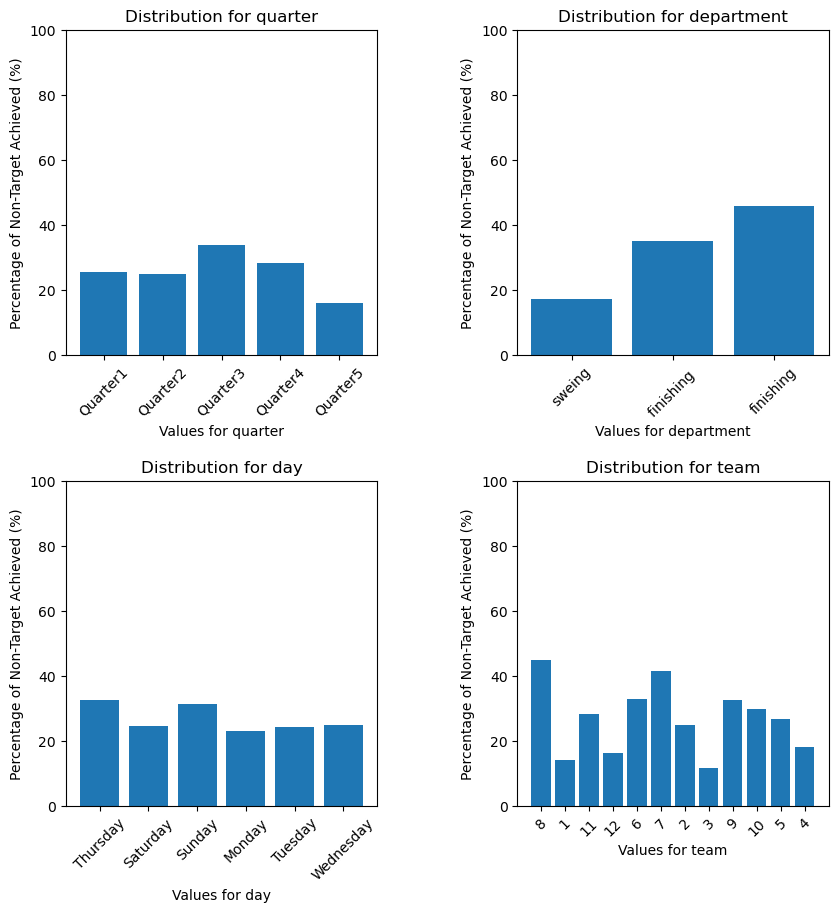

In [8]:
# Data Visualization - Histograms for Categorical Variables
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# Add padding between subplots
fig.tight_layout(pad=7.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and plot in a subplot
for i, feature in enumerate(categorical_features):
    # Calculate percentage of target_achieved for each category
    cat_values = [val for val in df[feature].unique() if str(val) != 'nan']
    with_non_target = [len(df[(df[feature] == val) & (df['non_achieve_target'] == 1)]) / len(df[df[feature] == val]) for val in cat_values]
    with_non_target = [x * 100 for x in with_non_target]

    # Plot bar chart
    ax = axes[i]
    ax.bar([str(x) for x in cat_values], with_non_target)
    ax.set_ylim(0, 100)
    ax.set_xlabel(f"Values for {feature}")
    ax.set_ylabel('Percentage of Non-Target Achieved (%)')
    ax.set_title(f"Distribution for {feature}")
    ax.tick_params(axis='x', rotation=45)

plt.show()

By examining the distribution charts for categorical features, especially for the `department` variable, we observed that the chart shows two distinct "finishing" values. This discrepancy likely indicates the presence of trailing spaces or typos. To address this, we previously removed any leading or trailing spaces from the `department` column. Such cleaning ensures that the categorical data is consistent and that each unique value truly represents a distinct category.

The code below plots histograms (using boxplots in a grid layout) for each categorical feature, showing the percentage of non-target (underachiever) observations for each category:

## Cleaning the 'department' Column

Trailing and leading spaces in categorical data can cause inconsistencies in analysis. In this step, we remove any extra spaces from the `department` column to ensure uniformity. After cleaning, we print the value counts to verify the correction.


In [9]:
# Remove leading/trailing spaces from 'department' column
X['department'] = X['department'].str.strip()
print(X['department'].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64


## Handling Multicollinearity

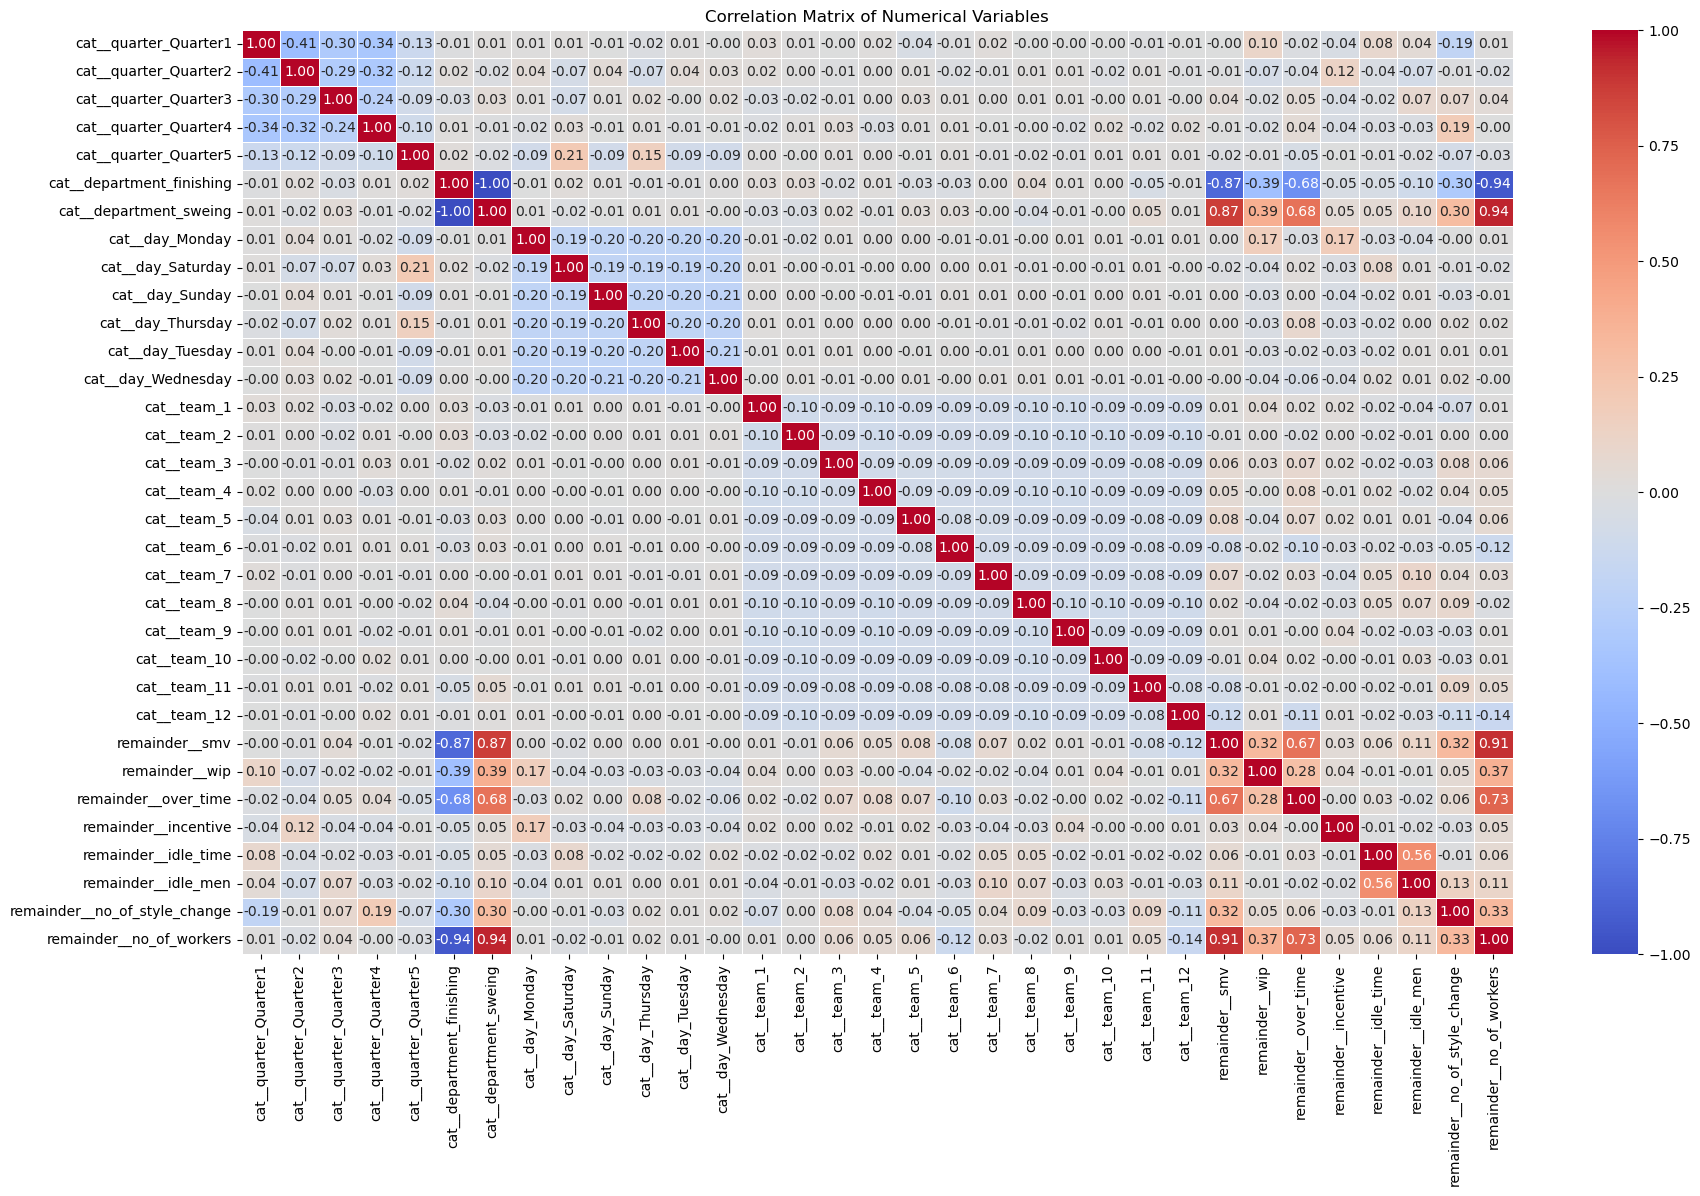

In [10]:
# transform the categorical features into dummy variables
dummy_trans = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')
X_trans = dummy_trans.fit_transform(X)
# Convert sparse matrix to dense DataFrame
X_trans_df = pd.DataFrame(X_trans, columns=dummy_trans.get_feature_names_out())

# Compute the correlation matrix
corr_matrix = X_trans_df.corr()

# Plot correlation matrix
plt.figure(figsize=(20.5, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

### Observations on Multicollinearity
We observed a strong linear correlation between the following columns: **`no_of_workers`**, **`smv`**, **`over_time`**, and **`department`**, with correlation coefficients greater than **0.6** (reference: [Correlation Coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient)). High multicollinearity can negatively impact model interpretability and performance, so we decided to retain **`no_of_workers`** and drop the remaining independent variables.

The updated dataset, with linearly correlated features removed, will now be used for model training and selection.

In [11]:
# Drop correlated columns.
X_non_corr = X.drop(['over_time', 'smv', 'department'], axis = 1)

## Train-Test Split with Shuffling

### Key Considerations:
- **Shuffling the data**: This prevents any cross-correlation between consecutive observations, ensuring that the train and test sets are representative of the overall dataset.
- **Setting `random_state`**: To maintain consistency across experiments, we set `random_state=42` (or any fixed value) for all processes involving randomness (e.g., data splitting, weight initialization). This ensures that results remain reproducible, allowing fair model comparisons and consistent hyperparameter tuning.

In [12]:
# Use a simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X_non_corr, y, shuffle=True, test_size=0.2, random_state=42)

## Hyperparameter Selection Strategy

### Procedure for Choosing the Best Hyperparameters (Regularization):

1. **Initial Range Selection**:  
   - An initial range \([low, high]\) is defined with representative values for hyperparameters (e.g., regularization strength `C`).

2. **Adaptive Search**:  
   - If the optimal hyperparameter value lies at the lower (or upper) bound, the range is adjusted downward (or upward) to explore a broader search space.

3. **Refinement**:  
   - This iterative process continues until the best value stabilizes within the refined range, ensuring optimal model selection.

### Models and Hyperparameter Grids:

The following dictionary defines models along with their hyperparameter grids:

- **Naïve Bayes**.  
- **Logistic Regression** (L1, L2, and no penalty).  
- **Linear and Quadratic Discriminant Analysis** (LDA, QDA).  
- **Support Vector Machines (SVM)** with different kernels (Linear, RBF, Polynomial).  


In [13]:
# Define Models and Hyperparameter Grids
models = {
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "Logistic Regression without penalty": {
        "model": LogisticRegression(solver='lbfgs', random_state=42),  # Default solver set to 'lbfgs'
        "params": {
            'classifier__penalty': [None]
        }
    },
    "Logistic Regression L1": {
        "model": LogisticRegression(solver='liblinear', random_state=42),  # Default solver set to 'liblinear'
        "params": {
            'classifier__C': np.logspace(-3, 3, 7),  # Regularization strength
            'classifier__penalty': ['l1']
        }
    },
    "Logistic Regression L2": {
        "model": LogisticRegression(solver='lbfgs', random_state=42),  # Default solver set to 'lbfgs'
        "params": {
            'classifier__C': np.logspace(-3, 3, 7),  # Regularization strength
            'classifier__penalty': ['l2']
        }
    },
    "LDA": {
        "model": LinearDiscriminantAnalysis(solver='svd'),
        "params": {}
    },
    "QDA": {
        "model": QuadraticDiscriminantAnalysis(),
        "params": {
            'classifier__reg_param': [0, 10e-5, 10e-3, 10e-1, 0.9]
        }
    },
    "SVM (Linear)": {
        "model": LinearSVC(random_state=42),
        "params": {
            'classifier__C': np.logspace(-3, 3, 7)  # Range for regularization
        }
    },
    "SVM (RBF)": {
        "model": SVC(kernel='rbf', random_state=42),
        "params": {
            'classifier__C': np.logspace(-9, 9, 7),  # Range for regularization
            'classifier__gamma': ['auto'] # Use auto because data will already be scaled prior to model fitting
        }
    },
    "SVM (Polynomial)": {
        "model": SVC(kernel='poly', random_state=42),
        "params": {
            'classifier__C': np.logspace(-6, 6, 7),  # Range for regularization
            'classifier__gamma': ['auto'],  # Use auto because data will already be scaled prior to model fitting
            'classifier__degree': [2, 3]  # Range for higher polynomial degrees
        }
    }
}

## Data Preprocessing Pipeline

We create a **pipeline** to standardize numerical variables and transform categorical variables into numerical representations using **one-hot encoding**. This ensures that all features are appropriately scaled and encoded before feeding them into machine learning models.

### Steps:
- **Numerical Features**: Standardized using `StandardScaler()`, which scales features to have zero mean and unit variance.
- **Categorical Features**: Transformed using `OneHotEncoder()`, ensuring unknown categories are ignored during inference.

### Implementation:


In [14]:
# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
  ('scaler', StandardScaler())
  ])
categorical_transformer = Pipeline(steps=[
  ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
  ])
preprocessor = ColumnTransformer(transformers=[
  ('num', numeric_transformer, make_column_selector(dtype_include='number')),  # Select numerical columns
  ('cat', categorical_transformer, make_column_selector(dtype_include='category'))  # Select categorical columns
  ])

## Hyperparameter Tuning with GridSearchCV and Stratified K-Fold

We perform **hyperparameter tuning** using **GridSearchCV** with **Stratified K-Fold cross-validation** to optimize model performance. 

### Key Steps:
1. **Pipeline Setup**:  
   - Each model is wrapped in a pipeline that includes the preprocessing steps (`preprocessor`) and the classifier.
   
2. **Stratified K-Fold Cross-Validation**:  
   - A 5-fold **Stratified K-Fold** (`n_splits=5`) is used to ensure balanced class distribution across folds.
   
3. **Hyperparameter Optimization**:  
   - GridSearchCV is used to tune hyperparameters, selecting the best configuration based on **recall**.
   
4. **Model Evaluation on Test Data**:  
   - The best model is used to predict test labels (`y_pred`), with **recall** as the primary evaluation metric. Additionally, other metrics such as accuracy, precision, F1 score, and ROC-AUC are computed for reference.
   
5. **Results Storage**:  
   - Model performance metrics are stored in `results`, and confusion matrices are saved for later analysis.

In [15]:
# Perform GridSearchCV with Stratified K-Fold on Training Data
results = []
confusion_matrices = {}

for name, config in models.items():
    print(f"Running GridSearchCV for {name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config["model"])
    ])

    # Stratified K-Fold for GridSearchCV (inner split)
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, config["params"], cv=inner_cv, scoring='recall')
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {name}:", best_params)

    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
    })

    # Store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

Running GridSearchCV for Naive Bayes...
Best Hyperparameters for Naive Bayes: {}
Running GridSearchCV for Logistic Regression without penalty...
Best Hyperparameters for Logistic Regression without penalty: {'classifier__penalty': None}
Running GridSearchCV for Logistic Regression L1...
Best Hyperparameters for Logistic Regression L1: {'classifier__C': 100.0, 'classifier__penalty': 'l1'}
Running GridSearchCV for Logistic Regression L2...
Best Hyperparameters for Logistic Regression L2: {'classifier__C': 100.0, 'classifier__penalty': 'l2'}
Running GridSearchCV for LDA...
Best Hyperparameters for LDA: {}
Running GridSearchCV for QDA...


c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\vijay\anaconda3\Lib\site-

Best Hyperparameters for QDA: {'classifier__reg_param': 0.01}
Running GridSearchCV for SVM (Linear)...
Best Hyperparameters for SVM (Linear): {'classifier__C': 10.0}
Running GridSearchCV for SVM (RBF)...
Best Hyperparameters for SVM (RBF): {'classifier__C': 1000000.0, 'classifier__gamma': 'auto'}
Running GridSearchCV for SVM (Polynomial)...
Best Hyperparameters for SVM (Polynomial): {'classifier__C': 10000.0, 'classifier__degree': 2, 'classifier__gamma': 'auto'}


In [16]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                                 Model  Test Accuracy  Precision    Recall  \
0                          Naive Bayes       0.554167   0.330769  0.682540   
1  Logistic Regression without penalty       0.729167   0.470588  0.253968   
2               Logistic Regression L1       0.733333   0.485714  0.269841   
3               Logistic Regression L2       0.729167   0.470588  0.253968   
4                                  LDA       0.750000   0.548387  0.269841   
5                                  QDA       0.550000   0.342657  0.777778   
6                         SVM (Linear)       0.745833   0.541667  0.206349   
7                            SVM (RBF)       0.695833   0.419355  0.412698   
8                     SVM (Polynomial)       0.695833   0.419355  0.412698   

   F1 Score   ROC-AUC  
0  0.445596  0.595507  
1  0.329897  0.576137  
2  0.346939  0.584073  
3  0.329897  0.576137  
4  0.361702  0.595373  
5  0.475728  0.623352  
6  0.298851  0.572101  
7  0.416000  0.604654  
8  

## Analysis of Model Performance

### Key Observations:

1. **Quadratic Discriminant Analysis (QDA) is Unreliable**  
   - Despite having the highest **Recall**, QDA **cannot be adopted** because our dataset includes many **low-variance independent variables** from the dummy transformation.  
   - This leads to **quasi-singular covariance matrices**, causing numerical instability and collinearity issues, making QDA's results unreliable.

2. **Best Model: Naive Bayes**  
   - Excluding QDA, **Naive Bayes** achieves the highest **Recall** among all models.  
   - Its **Recall (0.683)** is significantly better than the runner-up models (**SVM with RBF and Polynomial of degree 2, both at 0.413**).  
   - This suggests that **Naive Bayes is the most effective at detecting underachievers**.

3. **Trade-off Between Recall and Other Metrics**  
   - While **Naive Bayes** has the **lowest Accuracy and Precision**, this supports its focus on detecting underachievers.  
   - Since **achievers are the dominant class in our dataset**, a model prioritizing Recall over Precision aligns with our objective.

## Feature Selection for Model Improvement

After identifying the best model from the fitting process for each type of model, the next question arises:  
**Can we further enhance its performance?**  

To explore this, we apply **Forward Stepwise Selection**, a feature selection method that iteratively adds the most significant features, aiming to refine the model and improve predictive performance.


## Forward Stepwise Selection for Feature Selection

In [17]:
def forward_stepwise_selection(X, y, config):
    """
    Performs forward stepwise selection to identify the best subset of features.

    Args:
        X (pd.DataFrame): The feature matrix.
        y (pd.Series): The target variable.
        config (dict): A dictionary containing the model configuration.

    Returns:
        tuple: A tuple containing the selected features and their corresponding scores.
    """
    # Initialize empty lists to store selected features, remaining features, and scores
    current_features = list()  # List to store the selected features
    remaining_features = list(X.columns)  # List to store the remaining features
    scores = list()  # List to store the scores for each feature subset

    # Iterate while there are remaining features to evaluate
    while len(remaining_features) > 0:
        f1_old = 0  # Initialize the best score for the current iteration

        # Iterate over each remaining feature
        for feature in remaining_features:
            new_features = current_features.copy()  # Create a copy of the current feature subset
            new_features.append(feature)  # Add the current feature to the subset

            # Define the pipeline with preprocessing and the classifier
            numeric_transformer = Pipeline(steps=[
                ('scaler', StandardScaler())  # Standardize numerical features
                ])
            categorical_transformer = Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
                ])
            preprocessor = ColumnTransformer(transformers=[
                ('num', numeric_transformer, make_column_selector(dtype_include='number')),  # Apply numerical transformer to numerical features
                ('cat', categorical_transformer, make_column_selector(dtype_include='category'))  # Apply categorical transformer to categorical features
                ])
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),  # Apply preprocessing
                ('classifier', config['model'])  # Apply the classifier
                ])

            # Calculate the cross-validation score for the current feature subset
            f1s_new = cross_val_score(estimator=pipeline,
                                     X=X[new_features], y=y,
                                     scoring='recall',  # Use recall as the scoring metric
                                     cv=5)  # Perform 5-fold cross-validation
            f1_new = np.average(f1s_new)  # Calculate the average score

            # Update the best score and selected feature if the current feature improves the score
            if f1_new > f1_old:
                f1_old = f1_new
                selected_feature = feature

        # Add the selected feature to the list of current features
        current_features.append(selected_feature)
        # Remove the selected feature from the list of remaining features
        remaining_features.remove(selected_feature)
        # Add the score for the current feature subset to the list of scores
        scores.append(f1_old)

    # Return the selected features and their corresponding scores
    return current_features, scores

In [18]:
# Define Models to run for Forward stepwise
models = {
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "Logistic Regression without penalty": {
        "model": LogisticRegression(penalty=None, random_state=42)
    },
    "SVM (Linear)": {
        "model": LinearSVC(C=10, random_state=42)
    }
}
# Run Forward stepwise selection
results_fw = []
for name, config in models.items():
  print(f"Running {name}")
  selected_features, scores = forward_stepwise_selection(X_non_corr, y, config)
  results_fw.append([name, scores, selected_features])


Running Naive Bayes
Running Logistic Regression without penalty
Running SVM (Linear)


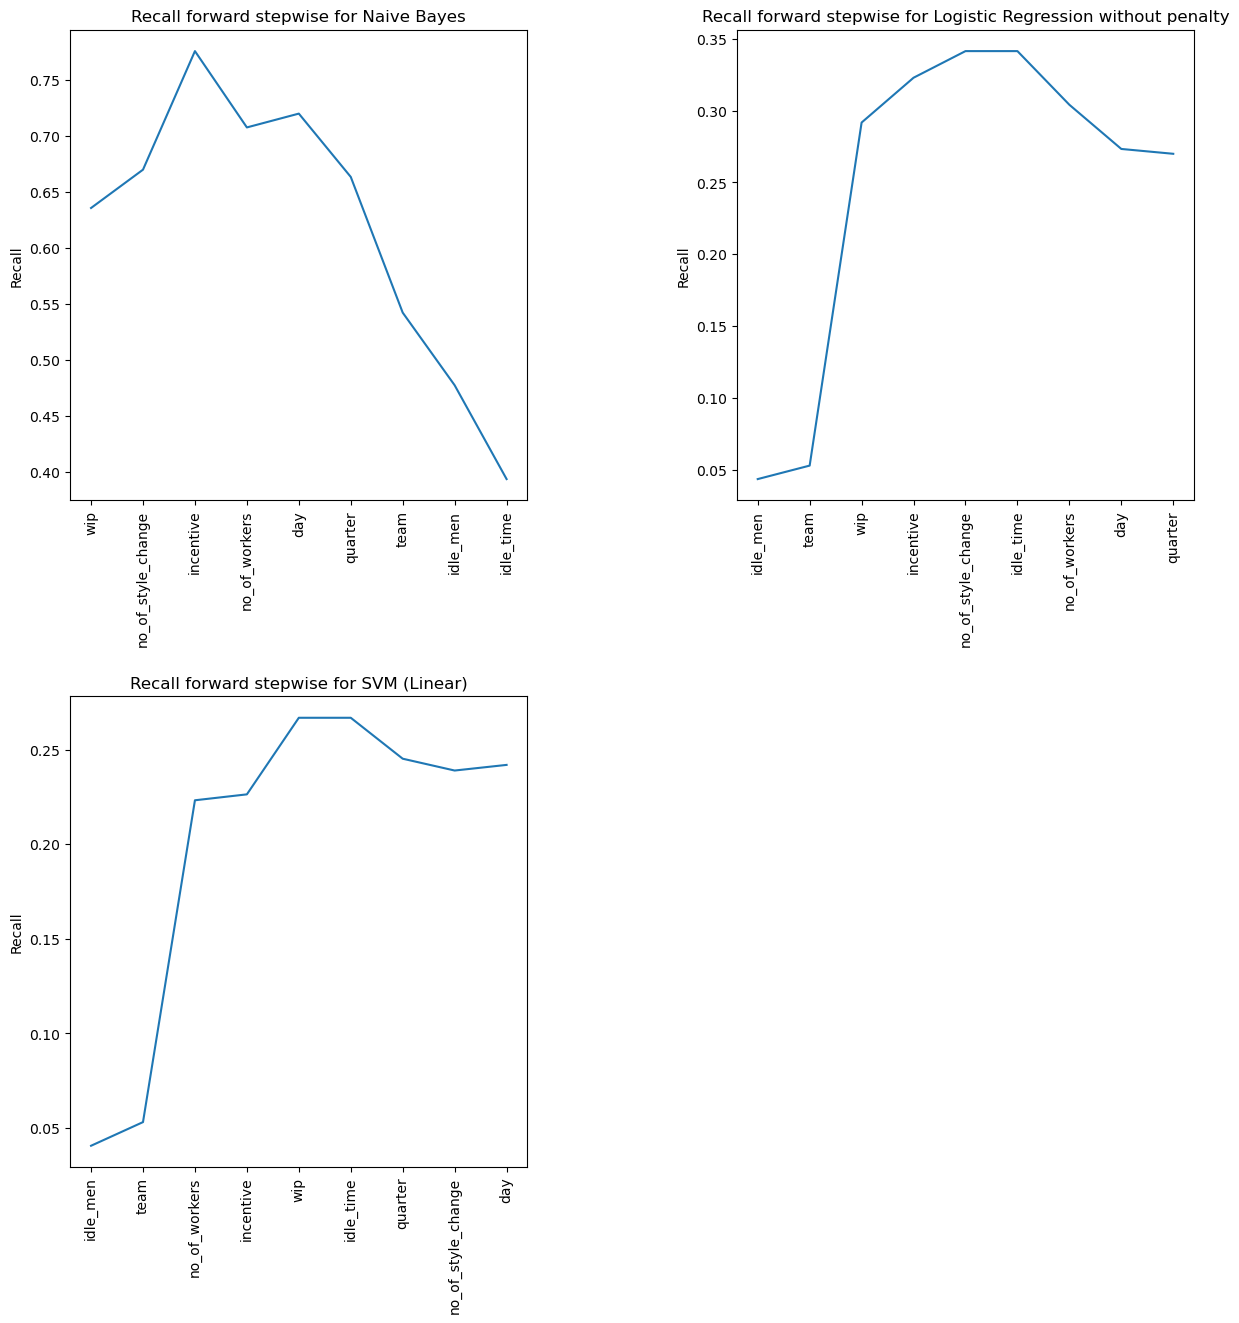

In [19]:
# Plot Recall scores for each model after Forward stepwise selection
fig, axes_ = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 15))
fig.tight_layout(pad=12)
axes = axes_.flatten()
for i in range(len(results_fw)):
    sns.lineplot(x=results_fw[i][2], y=results_fw[i][1], ax=axes[i])
    #axes[i].set_xlabel(f"Values for {feature}")
    axes[i].set_ylabel('Recall')
    axes[i].set_title(f"Recall forward stepwise for {results_fw[i][0]}")
    axes[i].tick_params(axis='x', rotation=90)
axes[3].remove()

### Key Remarks:
- We apply **Forward Stepwise Selection** to **three models only**:  
  - **Naive Bayes**
  - **Logistic Regression without regularization**
  - **Linear Support Vector Classifier (SVC)**  

### Reasons for Selecting These Models:
1. **Low Computational Cost**: These models are relatively fast to train.
2. **Effectiveness Evaluation**: We aim to assess whether Forward Stepwise Selection is generally beneficial.
3. **Optimizing the Best Model**: Since **Naive Bayes** was identified as the best-performing model, we explore how much it can be further improved.

---

### About the Graph:

- The **X-axis** represents the number of selected features **K**, where each value \( k \)-th corresponds to the best feature combination **S**:

$$
S = \{X_1, X_2, \dots, X_k\}, \quad K = |S|
$$

  Here, \( S \) denotes the selected subset of features, and \( K \) represents the total number of features included in the model at each step.

- The **Y-axis** represents the **Recall Score** for each feature subset.
- Based on the trend of the graph, we select the feature combination that yields the **highest Recall**:

### Best Feature Subsets for Forward Stepwise Selection:
- **Naive Bayes**: `['wip', 'no_of_style_change', 'incentive']`
- **Logistic Regression without regularization**: `['idle_men', 'team', 'wip', 'incentive', 'no_of_style_change', 'idle_time']`
- **Linear Support Vector Classifier**: `['idle_men', 'team', 'no_of_workers', 'wip', 'incentive']`

In [20]:
# Update selected features for each model based on Forward stepwise selection results
results_fw[0][2] = ['wip', 'no_of_style_change', 'incentive'] # Naive Bayes
results_fw[1][2] = ['idle_men', 'team', 'wip', 'incentive', 'no_of_style_change','idle_time'] # Logistic regression without regulation
results_fw[2][2] = ['idle_men', 'team', 'no_of_workers', 'wip', 'incentive'] # Linear Support Vector Classifier

## Retraining Models After Feature Selection

### Objective:
After selecting the **optimal feature subsets** using **Forward Stepwise Selection**, we retrain the models using only the selected features to evaluate their final performance.

### Updated Model Set:
We redefine the models and hyperparameter grids for **Naive Bayes, Logistic Regression (without penalty), and Linear SVM**:

1. **Naive Bayes**:
   - No hyperparameters to tune.

2. **Logistic Regression (without penalty)**:
   - Solver: `lbfgs` (default)
   - No penalty (no regularization applied).

3. **Linear SVM**:
   - Regularization parameter `C` is set to **10**, based on previous tuning.

In [21]:
# Re-define Models and Hyperparameter Grids for evaluation after feature selection
models = {
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "Logistic Regression without penalty": {
        "model": LogisticRegression(solver='lbfgs', random_state=42),  # Default solver set to 'lbfgs'
        "params": {
            'classifier__penalty': [None]
        }
    },
    "SVM (Linear)": {
        "model": LinearSVC(random_state = 42),
        "params": {
            'classifier__C': [10]  # Range for regularization
        }
    }
}

In [22]:
# create a dictionary
results_dict = {}
for name, scores, selected_features in results_fw:
    results_dict[name] = [scores, selected_features]
# Perform test
for model_name in results_dict.keys():
    print(model_name)
  # Use a simple train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_non_corr[results_dict[model_name][1]], y, shuffle=True, test_size=0.2, random_state=42)

    results = []
    confusion_matrices = {}

    for name, config in models.items():
        if name == model_name:
            print(f"Running GridSearchCV for {name}...")
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', config["model"])
            ])

            # Stratified K-Fold for GridSearchCV (inner split)
            inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            grid_search = GridSearchCV(pipeline, config["params"], cv=inner_cv, scoring='recall')
            grid_search.fit(X_train, y_train)

            # Get the best hyperparameters
            #best_params = grid_search.best_params_
            #print(f"Best Hyperparameters for {name}:", best_params)

            # Evaluate on the test set
            y_pred = grid_search.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            # Store results
            results.append({
                "Model": name,
                "Test Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1 Score": f1,
                "ROC-AUC": roc_auc,
            })

            # Store confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            confusion_matrices[name] = cm
            # print metrics
            results_df = pd.DataFrame(results)
            print(f'Metrics for {name}')
            print(results_df)
            print('---------------------------')


Naive Bayes
Running GridSearchCV for Naive Bayes...
Metrics for Naive Bayes
         Model  Test Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Naive Bayes       0.608333   0.373984  0.730159  0.494624  0.647565
---------------------------
Logistic Regression without penalty
Running GridSearchCV for Logistic Regression without penalty...
Metrics for Logistic Regression without penalty
                                 Model  Test Accuracy  Precision    Recall  \
0  Logistic Regression without penalty         0.7125   0.428571  0.285714   

   F1 Score   ROC-AUC  
0  0.342857  0.575061  
---------------------------
SVM (Linear)
Running GridSearchCV for SVM (Linear)...
Metrics for SVM (Linear)
          Model  Test Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  SVM (Linear)           0.75   0.545455  0.285714     0.375  0.600484
---------------------------


### **Key Findings:**
1. **All three models showed an improvement in Recall after applying Forward Stepwise Selection**:
   - **Naive Bayes**: Improved from **0.6825** to **0.7302** (**+6.98%**).
   - **Logistic Regression (without Regularization)**: Improved from **0.2540** to **0.2857** (**+12.5%**).
   - **Linear Support Vector Classifier**: Improved from **0.2063** to **0.2857** (**+38.46%**).

2. **Effectiveness of Forward Stepwise Selection**:
   - The results demonstrate that **selecting an optimal subset of features** can enhance model performance.
   - While **Naive Bayes remained the best model**, both **Logistic Regression and SVC saw significant gains in Recall**, validating the effectiveness of feature selection.
